<!-- comment this is a comment heading -->
# CS 229: Machine Learning

<!-- How to make a checkbox: <input type="checkbox">Completed?</input> -->

### Supervised Learning

- **Labelled Data**: Data with known labels (e.g., images, text)
- **Training Set**: A subset of the labelled data used to train a model
- **Testing Set**: A subset of the labelled data used to evaluate the trained model

The hypothesis function $h(x)$ is a function that maps input features to output labels. We can use supervised learning algorithms to learn this hypothesis function from the training set. If we have two features, we can write the hypothesis function as follows:

$ h(x) = \sum_{j=0}^{2} \theta_j x_j $

where $\theta_j$ are the weights and $x_j$ are the input features; we define $x_0 = 1$ and therefore $\theta_0$ is the bias term.

$ \theta = \begin{pmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{pmatrix} $
$ x = \begin{pmatrix} 1 \\ x_1 \\ x_2 \end{pmatrix} $

This is an affine function (which means a linear function with a constant term).

| Terminology |
| --- |
| $ \theta = $ "parameters" |
| $ m = $ "number of training examples" |
| $ n = $ "number of features" |
| $ x = $ "input data / features" |
| $ y = $ "output labels / target data" |
| $ (x, y) $ = "training example" |

In [317]:
import numpy as np
#np.random.seed(42)

# Define the hypothesis function
def h(x, theta):
    return x @ theta
    # return np.dot(x, theta)

n = 2 # number of features (excluding bias term)
m = 10 # number of training examples

features = n+1 # including bias term

x = np.random.rand(m, features) # input data
theta = np.random.rand(features)
# x = np.array([[1,2,3], [4,5,6]])

theta = np.array([1, 2, 3])
print(f'{x.shape=} {theta.shape=}')
# print(f'{x=} {theta=}')
print(h(x, theta))
print(np.mean(h(x, theta)))

x.shape=(10, 3) theta.shape=(3,)
[3.41294576 1.75326503 4.24482777 5.43309214 2.44961306 2.74346739
 3.06829328 3.92873228 3.60080464 4.67245747]
3.5307498829082817


The goal is to choose the parameters $\theta$ that minimize the error between the predicted output and the actual target data.

Choose $ \theta $ such that $ h(x) \approx y $.

$ h_\theta(x) = h(x) $

$ x_{}^{(i)} $ is the $i$-th training example.

Cost function: $ J(\theta) = \frac{1}{2} \sum_{i=1}^m (h_\theta(x_{}^{(i)}) - y_{}^{(i)})^2 $

minimize $ J(\theta) $ to find the optimal $\theta$.

### Gradient Descent

Start with some initial guess for $\theta$, and iteratively update it based on the gradient of the cost function. The gradient is a vector that points in the direction of steepest ascent of the cost function. The learning rate determines how fast the parameters are updated.

The formula for updating $\theta$ using gradient descent is:

$ \theta_j := \theta_j - \alpha \cdot \frac{\partial}{\partial \theta_j} J(\theta)$ for all $j$.

Where:

- $j$ is the index of the parameter being updated
- $J(\theta)$ is the cost function evaluated at $\theta$
- $\alpha$ is the learning rate

The learning rate should be chosen carefully, as too small a learning rate can cause slow convergence, while too large a learning rate can cause overshooting and instability.

> "If the features are scaled to +1 to -1, learning rate could be chosen to start at 0.01."

In [406]:
def update_theta(theta, alpha, grad):
    return theta - alpha * grad

def gradient_descent(X, y, alpha=0.001, num_iterations=100000):
    """
    (Batch) gradient descent algorithm for linear regression.
    """
    n = X.shape[1]
    theta = np.random.rand(n)
    # theta = np.zeros(n)

    for i in range(num_iterations):
        # Calculate the predictions
        y_pred = X @ theta
        # Calculate the gradients
        grad = ((y_pred - y) @ X)
        # Update the parameters
        theta = update_theta(theta, alpha, grad)
        # print(f'{i}: {theta=} {grad=}')
    return theta

def stochastic_gradient_descent(X, y, alpha=0.005, num_iterations=100000):
    """
    Stochastic gradient descent algorithm for linear regression.
    This version uses a single training example at each iteration compared to the (batch) gradient descent
    above which updates using the entire dataset at each iteration. This can be faster than the batch
    gradient descent but may not converge as quickly.
    """
    n = X.shape[1]
    theta = np.random.rand(n)
    # theta = np.zeros(n)
    for i in range(num_iterations):
        for j in range(X.shape[0]):
            y_pred_j = X[j] @ theta
            error = y_pred_j - y[j]
            grad = error * X[j]
            theta = update_theta(theta, alpha, grad)
        if i % 10000 == 0:
            print(f'{i}: {theta=} {grad=}')
    return theta

# Input:
#X = np.array([[1, 1, 1], [1, 2, 4], [1, 3, 9], [1, 4, 16]]) # first feature is the bias term, the x, then x^2

# define a function to translate x into a vector of 1,x,x^2
X_raw = [1, 2, 3, 4]
def translate_x(x):
    return np.array([1, x, x**2])

X = np.array([translate_x(x) for x in X_raw])

# Output:
# y = np.array([1, 4, 9, 16])  # non-linear -- y = x^2 
y = np.array([6, 16, 32, 54])  # non-linear -- y = 3x^2 + x + 2
# y = np.array([7, 12, 17, 22])  # y = 5x + 2

print(f'{X.shape=} {y.shape=}')
#theta = gradient_descent(X, y)
theta = stochastic_gradient_descent(X, y)
print("Final theta:", theta)

def calculate_loss(X, y, theta):
    predictions = X @ theta
    loss = np.sum((predictions - y) ** 2)
    return loss

print(f'Loss after training: {calculate_loss(X, y, theta)}')

print(f'{X @ theta}')
print(f'{translate_x(10) @ theta}')
print(f'{np.linalg.inv(X.T @ X) @ (X.T @ y)=}') # Algebraic solution when derivative of J(theta) = 0
print(f'{(np.linalg.inv(X.T @ X) @ (y.T @ X)).T=}')


X.shape=(4, 3) y.shape=(4,)
0: theta=array([0.91531332, 1.13420377, 3.55656283]) grad=array([ -22.89625677,  -91.58502706, -366.34010824])
10000: theta=array([1.9903157 , 1.00826966, 2.99856876]) grad=array([-0.0013549 , -0.00541959, -0.02167835])
20000: theta=array([1.99984949, 1.00012853, 2.99997776]) grad=array([-2.10577190e-05, -8.42308761e-05, -3.36923504e-04])
30000: theta=array([1.99999766, 1.000002  , 2.99999965]) grad=array([-3.27277760e-07, -1.30911104e-06, -5.23644417e-06])
40000: theta=array([1.99999996, 1.00000003, 2.99999999]) grad=array([-5.08653386e-09, -2.03461354e-08, -8.13845418e-08])
50000: theta=array([2., 1., 3.]) grad=array([-7.90620902e-11, -3.16248361e-10, -1.26499344e-09])
60000: theta=array([2., 1., 3.]) grad=array([-1.22213351e-12, -4.88853402e-12, -1.95541361e-11])
70000: theta=array([2., 1., 3.]) grad=array([-5.68434189e-14, -2.27373675e-13, -9.09494702e-13])
80000: theta=array([2., 1., 3.]) grad=array([-5.68434189e-14, -2.27373675e-13, -9.09494702e-13])
9

# Stochachastic Gradient Descent

When the number of training examples is large, it can be too expensive to analyse the entire dataset for each iteration. If for example your dataset is 1TB, just reading that dataset from disk becomes prohibitively slow.

Using stochastic gradient descent (SGD) allows you to perform an update per training example, rather than going through them all. This makes it much faster and more scalable for large datasets.

If you imagine gradient descent as a hill-climbing algorithm, GD is like taking one step at a time down the slope of the loss function. It starts at the top of the hill (the initial theta values) and moves downhill until it reaches the bottom (the minimum loss). GD chooses the steepest path to move down the hill at each step, whereas SGD only looks at a single example at a time and uses only that knowledge to step down the slope -- this may not be the optimium path and instead may move around noisily towards the minimum.

SGD by virtue of looking at individual examples, may also not converge exactly on the minimum and instead oscillate around the mininum. In contrast, GD will always converge to the global minimum if it is convex (i.e., there are no local minima). SGD however, does not guarantee convergence.

The learning rate corresponds roughly to how big a step you take down the slope at each iteration. If you set the learning rate too high, your model may overshoot the minimum and diverge. If you set it too low, your model will converge slowly and might never reach the minimum. The optimal learning rate depends on the specific problem and dataset.

You can also adjust the learning rate as e.g. 1 / (t + 1) where t is the iteration number. This is called a decay schedule.

# Mini-batch SGD

In mini-batch SGD, you randomly sample a subset of the data at each iteration. This can help reduce variance and improve convergence speed compared to vanilla SGD.

Randomly sampling for each batch is necessary for example if you consider that a dataset may be sorted such that all positive examples come before negative ones.

In [319]:
def sgd(X, y, lr=0.01, weights=None):
    """
    Perform stochastic gradient descent on the given data.
    Args:
        X (numpy.ndarray): Input features.
        y (numpy.ndarray): Target labels.
        lr (float): Learning rate.
    Returns:
        numpy.ndarray: Updated weights after SGD.
    """
    if weights is None:
        weights = np.zeros(X.shape[1])
    for i in range(len(y)):
        gradient = 2 * X[i] * (np.dot(X[i], weights) - y[i])
        weights -= lr * gradient
    return weights

X = np.array([[1, 2], [1, 4]])
y = np.array([0, 1])
weights = None
for i in range(1000):
    weights = sgd(X, y, weights=weights)  # This will update the weights based on the current data and learning rate.
    if i % 100 == 0:
        print(f"Iteration {i+1}: Loss = {np.mean((y - np.dot(X, weights))**2)}")

print("Updated weights:", weights)


Iteration 1: Loss = 0.23399999999999993
Iteration 101: Loss = 0.051146342994597964
Iteration 201: Loss = 0.02311130942281546
Iteration 301: Loss = 0.010443222173157794
Iteration 401: Loss = 0.004718940297267173
Iteration 501: Loss = 0.0021323301525087244
Iteration 601: Loss = 0.0009635281637131656
Iteration 701: Loss = 0.00043538591862812734
Iteration 801: Loss = 0.0001967362297009953
Iteration 901: Loss = 8.889847471163438e-05
Updated weights: [-0.9800318   0.49425807]


# Matrix Derivatives


$ \nabla_A trAB = B^T $

> $ AB = \begin{pmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{pmatrix} \begin{pmatrix} B_{11} & B_{12} \\ B_{21} & B_{22} \end{pmatrix} = \begin{pmatrix} A_{11}B_{11} + A_{12}B_{21} & A_{11}B_{12} + A_{12}B_{22}  \\ A_{21}B_{11} + A_{22}B_{21} & A_{21}B_{12} + A_{22}B_{22}  \end{pmatrix} $
>
> $ tr(AB) = A_{11}B_{11} + A_{12}B_{21} + A_{21}B_{12} + A_{22}B_{22} $
>
> $ tr(AB) = \sum_{i,j} A_{ij} B_{ji} $
>
> Elementwise differentiation of the trace:
> $ \frac{\partial}{\partial A_{ij}} tr(AB) = B_{ji} $
> 
> Given that:
> $ \nabla_A f(A) = \begin{pmatrix} \frac{\partial}{\partial A_{11}} f(A) & \frac{\partial}{\partial A_{12}} f(A) \\ \frac{\partial}{\partial A_{21}} f(A) & \frac{\partial}{\partial A_{22}} f(A) \end{pmatrix} $
>
> => $ \nabla_A tr(AB) = \begin{pmatrix} \frac{\partial}{\partial A_{11}} tr(AB) & \frac{\partial}{\partial A_{12}} tr(AB) \\ \frac{\partial}{\partial A_{21}} tr(AB) & \frac{\partial}{\partial A_{22}} tr(AB) \end{pmatrix} = \begin{pmatrix} B_{11} & B_{21} \\ B_{12} & B_{22} \end{pmatrix} = B^T $


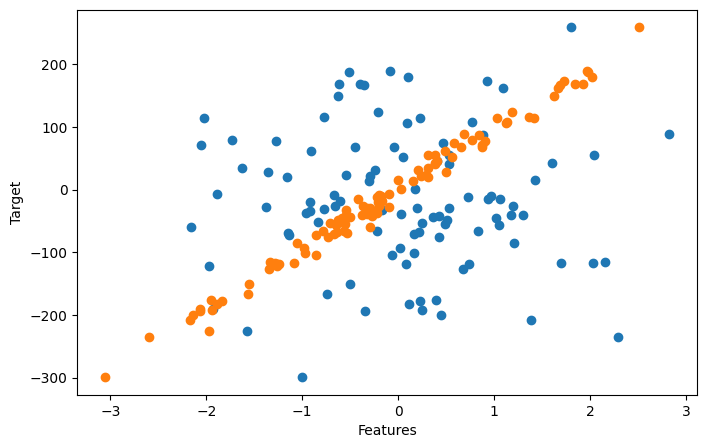

In [320]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate a regression problem
X, y = make_regression(
    n_samples=100,
    n_features=2,
    n_informative=2,
    noise = 10,
    random_state=25
    )

# Visualize feature at index 1 vs target
plt.subplots(figsize=(8, 5))
plt.scatter(X[:, 0], y, marker='o')
plt.scatter(X[:, 1], y, marker='o')
plt.xlabel("Features")
plt.ylabel("Target")
plt.show()

# Analytical solution for linear regression

The analytical solution to the linear regression problem can be derived using matrix algebra. The goal is to find the coefficients \(\theta\) that minimize the mean squared error (MSE) between the predicted and actual target values.

The cost function for linear regression from earlier is given by:

$ J(\theta) = \frac{1}{2} \sum_{i=1}^m (h_\theta(x_{}^{(i)}) - y_{}^{(i)})^2 $


## Matrix definition of cost function
If we define $X$ as a matrix whose rows correspond to the feature vectors $x^{(i)}$ and $\hat{y}$ as a vector of target values, the cost function becomes:
$$ J(\theta) = \frac{1}{2} (X \theta - y)^T (X \theta - y) $$

We can see this as follows:

$X$ is an $m \times n$ matrix, where $m$ is the number of samples and $n$ is the number of features. The vector $\hat{y}$ is a vector of length $m$, containing the target values for each sample.

$$ X = \begin{bmatrix}
x_{0}^{(1)} & x_{1}^{(1)} & \cdots & x_{n}^{(1)} \\
x_{0}^{(2)} & x_{1}^{(2)} & \cdots & x_{n}^{(2)} \\
\vdots \\
x_{0}^{(m)} & x_{1}^{(m)} & \cdots & x_{n}^{(m)} \\
\end{bmatrix} $$

$$ \hat{y} = \begin{bmatrix}
y_{}^{(1)} \\
y_{}^{(2)} \\
\vdots \\
y_{}^{(m)} \\
\end{bmatrix} $$

With $h_\theta(x^{(i)}) = (x^{(i)})^T \theta $, we can write the error vector as:

$$ X\theta - y = \begin{bmatrix}
(x^{(1)})^T \theta - y_{}^{(1)} \\
(x^{(2)})^T \theta - y_{}^{(2)} \\
\vdots \\
(x^{(m)})^T \theta - y_{}^{(m)} \\
\end{bmatrix} =  \begin{bmatrix}
h_\theta(x^{(1)}) - y_{}^{(1)} \\
h_\theta(x^{(2)}) - y_{}^{(2)} \\
\vdots \\
h_\theta(x^{(m)}) - y_{}^{(m)} \\
\end{bmatrix} 
$$

Using $z^Tz = \sum_{j} z_j^2 $, with $z = X\theta - y$ and $z_j = (h_\theta(x^{(i)}) - y_{}^{(i)})$, we get:

$$ \frac{1}{2} (X \theta - y)^T (X \theta - y) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 = J(\theta) $$


## Minimizing the Cost Function

To minimize this cost function, we take the derivative with respect to $\theta$ and set it to zero:
$ \nabla_\theta J(\theta) = 0 $

And using the following rules:

$$ \begin{aligned}
\frac{d}{dx} (Ax) &= A \\
\frac{d}{dx} (x^TA) &= A^T \\
\frac{d}{dx} (x^T Ax) &= 2x^T A   - \text{(if A is symmetric)} \\
\end{aligned} $$

$ X^TX $ is symmetric.

And finally, we get:

$ \begin{aligned}
\nabla_\theta J(\theta) &= \nabla_\theta \frac{1}{2} (X \theta - y)^T (X \theta - y) \\
                        &= \frac{1}{2} \nabla_\theta ( (X\theta)^T (X\theta) - (X\theta)^T y - y^T (X \theta) - y^T y) \\
                        &= \frac{1}{2} \nabla_\theta ( \theta^T X^T X \theta - \theta^T X^T y - y^T X \theta - y^T y ) \\
                        &= \frac{1}{2} ( 2 \theta^T (X^T X) - (X^T y)^T - (y^T X) ) \\
                        &= \frac{1}{2} ( 2 \theta^T X^T X - y^TX - y^T X ) \\
                        &= \frac{1}{2} ( 2 \theta^T X^T X - 2 y^TX ) \\
                        &= \theta^T X^T X - y^TX \\
\end{aligned} $

Setting this to 0 finds us the points where it is minimised:

$ \theta^T X^T X - y^TX = 0 $

This leads to the normal equations:

$ \theta^T X^T X = y^TX $

$ (\theta^T X^T X)^T = (y^TX)^T $

$ X^T X \theta = X^T y $

These equations can be solved for $\theta$:

$$ \theta = (X^T X)^{-1} X^T y $$

In Python using NumPy, this looks like

```
    theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
    theta = (np.linalg.inv(X.T @ X) @ (y.T @ X)).T
```


(This was with a bunch of help from especially these two sources:

https://math.stackexchange.com/questions/4177039/deriving-the-normal-equation-for-linear-regression

https://en.wikipedia.org/wiki/Matrix_calculus#Vector-by-vector_identities).

# Locally Weighted Linear Regression

Local weighted linear regression is a method for fitting a linear model to data points that are close to each other. It uses a weighting function to give more weight to the data points that are closer to the target point.

The weight function looks like a Guassian but is not exactly a Guassian. It is defined as:
$$ w_i = \exp(-\frac{(x^{(i)} - x)^2}{2\tau^2})  $$

The formula for the local weighted linear regression is:

$$ J(\theta) = \frac{1}{2} \sum_{i=1}^m w_i (h_\theta(x_{}^{(i)}) - y_{}^{(i)})^2 $$

In matrix form:

$$ J(\theta) = \frac{1}{2} (W X \theta - y)^T (W X \theta - y) $$

where W is a diagonal matrix with the weights $w_i$ on the diagonal.

Going through the derivative as before:

$ \begin{aligned}
\nabla_\theta J(\theta) &= \nabla_\theta \frac{1}{2} (WX \theta - y)^T (WX \theta - y) \\
                        &= \frac{1}{2} \nabla_\theta ( (WX\theta)^T (WX\theta) - (WX\theta)^T y - y^T (WX \theta) - y^T y) \\
                        &= \frac{1}{2} \nabla_\theta ( \theta^T X^T W^T X \theta - \theta^T X^T W^T y - y^T WX \theta - y^T y ) \\
                        &= \frac{1}{2} ( 2 \theta^T (X^T W^T X) - (X^T W^T y)^T - (y^T WX) ) \\
                        &= \frac{1}{2} ( 2 \theta^T X^T W^T X - y^TWX - y^T WX ) \\
                        &= \frac{1}{2} ( 2 \theta^T X^T W^T X - 2 y^TWX ) \\
                        &= \theta^T X^T W^T X - y^TWX \\
\end{aligned} $

Set to 0 and use the fact W is symmetric, gets to:

$ \begin{aligned}
\theta^T X^T W^T X - y^TWX &= 0 \\ 
\theta^T X^T W^T X &= y^TWX \\
(\theta^T X^T W^T X)^T &= (y^TWX)^T \\
X^T WX \theta &= X^T W^T y \\
\theta &= (X^T WX)^{-1} (X^T W^T y) \\
\theta &= (X^T WX)^{-1} (X^T W y) \\
\end{aligned} $

In [407]:
def local_weighted_linear_regression(X, y, tau, target_x):
    # Calculate the weights for each data point
    W = np.exp(-((X - target_x) ** 2) / (tau ** 2))
    W = np.diag(W.squeeze())
    print(f'{W=}')
    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
    print(f'{theta=}')
    return [target_x] @ theta

X_raw = [1, 2, 3, 4]
def translate_x(x):
    return np.array([x])

X = np.array([translate_x(x) for x in X_raw])
# y = np.array([1, 4, 9, 16])  # non-linear -- y = x^2 
y = np.array([6, 16, 32, 54])  # non-linear -- y = 3x^2 + x + 2
# y = np.array([7, 12, 17, 22])  # y = 5x + 2

# Tau is the "bandwidth", or how far away from the point we're interested in we look for neighbors.
# When very small, it only considers points very close to the target point.
tau = 0.1
print(local_weighted_linear_regression(X, y, tau, 2)) # close to 16, overfitting

# Bigger values of tau spread out the weighting. When very large, effectively all points are weighted equally. 
tau = 100000
print(local_weighted_linear_regression(X, y, tau, 2)) # close to the linear regression line, underfitting

# This should be the same as the locally weighted result with large tau
print(f'{gradient_descent(X, y)=}')

W=array([[3.72007598e-044, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 3.72007598e-044,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.91516960e-174]])
theta=array([8.])
16.0
W=array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])
theta=array([11.66666667])
23.333333332648888
gradient_descent(X, y)=array([11.66666667])
